# Введение

Датасет взят с kaggle: https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction

Рассматривается задача о выдаче кредитной карты заявителю. Необходимо обучить модель для предсказания, является ли соискатель хорошим или плохим клиентом. При этом целевую переменную нужно выделить самостоятельно.

# Описание и подготовка данных

Имеются два датасета, которые связаны признаком ID. Датасет **application_record.csv** содержит личную информацию о соискателе. Признаки в датасете следующие:

- **ID** - Номер клиента  
- **CODE_GENDER** - Пол  
- **FLAG_OWN_CAR** - Есть ли автомобиль  
- **FLAG_OWN_REALTY** - Есть ли недвижимость  
- **CNT_CHILDREN** - Количество детей  
- **AMT_INCOME_TOTAL** - Годовой доход  
- **NAME_INCOME_TYPE** - Категория дохода  
- **NAME_EDUCATION_TYPE** - Уровень образования  
- **NAME_FAMILY_STATUS** - Семейное положение  
- **NAME_HOUSING_TYPE** - Условия проживания  
- **DAYS_BIRTH** - День рождения (Отсчет назад с текущего дня (0), -1 значит вчера)  
- **DAYS_EMPLOYED** - Дата начала работы (Отсчет назад с текущего дня (0). Если положительно, человек сейчас без работы)  
- **FLAG_MOBIL** - Есть ли мобильный телефон  
- **FLAG_WORK_PHONE** - Есть ли рабочий телефон  
- **FLAG_PHONE** - Есть ли домашний телефон  
- **FLAG_EMAIL** - Есть ли электронная почта  
- **OCCUPATION_TYPE** - Род занятий  
- **CNT_FAM_MEMBERS** - Размер семьи  


Датасет **credit_record.csv** записывает поведение пользователей при использовании кредитных карт. Его признаки:

- **ID** - номер клиента
- **MONTHS_BALANCE** - фиксирует месяц (Месяц полученных данных является начальной точкой, в обратном порядке, 0 - текущий месяц, -1 - предыдущий месяц и т.  д.)
- **STATUS** - Статус (0: просроченные на 1-29 дней, 1: просроченные на 30-59 дней, 2: просроченные на 60-89 дней, 3: просроченные на 90-119 дней, 4: просроченные на 120-149 дней, 5: просроченные долги более чем на 150 дней, C: погашены в этом месяце, X: Нет кредита в течение месяца)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
application_data = pd.read_csv('/content/drive/MyDrive/Data/application_record.csv')
credit_data = pd.read_csv('/content/drive/MyDrive/Data/credit_record.csv')

In [ ]:
application_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
credit_data.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


## Очистка данных

Проверим, есть ли дубликаты в датасете с личной информацией клиентов:

In [ ]:
print(application_data['ID'].duplicated().sum())

47


Уберем их:

In [ ]:
application_data = application_data.drop_duplicates('ID', keep = 'last')

Посмотрим на количество совпадений ID в датасете с информацией о кредитных картах:

In [ ]:
print(credit_data['ID'].duplicated().sum())

1002590


Повторы объясняются тем, что для одного клиента есть записи с разным статусом и месячным значением.

Теперь посмотрим на пропуски в данных:

In [ ]:
application_data.isna().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


В столбце **OCCUPATION_TYPE** много нулевых значений, удалим его:

In [ ]:
application_data.drop('OCCUPATION_TYPE', axis=1, inplace=True)

Теперь к пропускам в датасете credit_data:

In [ ]:
credit_data.isna().sum()

,0
ID,0
MONTHS_BALANCE,0
STATUS,0


Здесь их нет.

Рассмотрим признаки, у которых числовые значения (кроме ID), выведем их:

In [ ]:
numerical_columns = application_data.select_dtypes(include=['number']).columns.tolist()
numerical_columns.remove('ID') #ID не понадобится для использования
numerical_columns

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS']

Для визуализации построим боксплоты с этими признаками:

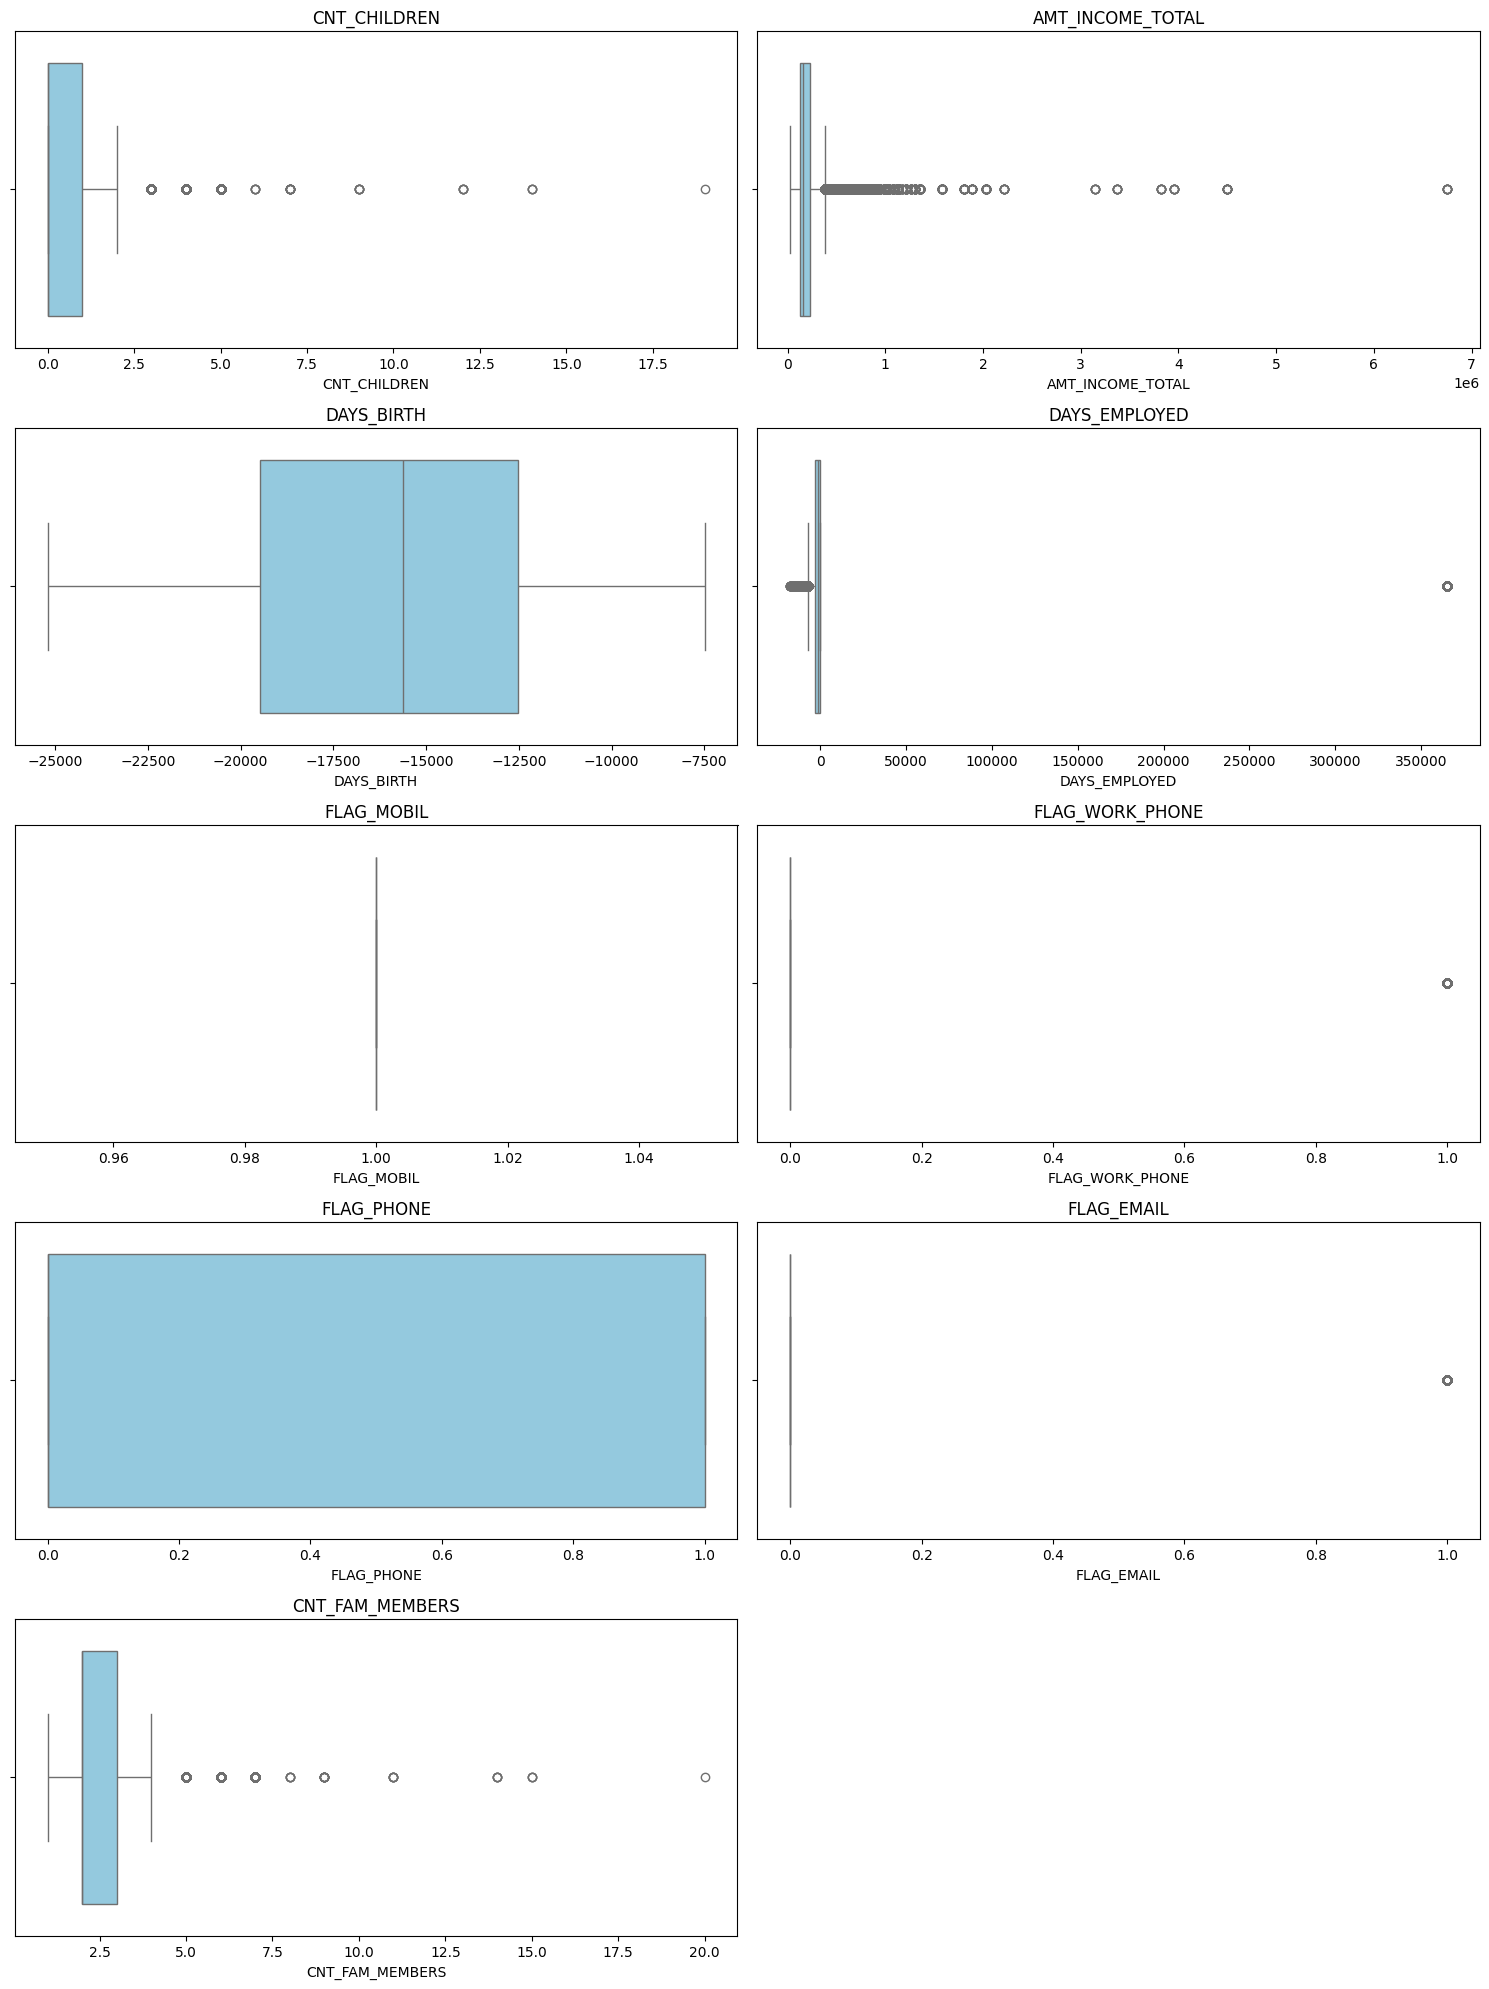

In [ ]:
n_cols = 2
n_rows = math.ceil(len(numerical_columns) / n_cols)

plt.figure(figsize=(15, n_rows * 4))

for i, col in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=application_data[col], color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()

В столбцах **CNT_CHILDREN**, **AMT_INCOME_TOTAL**, **DAYS_EMPLOYED**, **CNT_FAM_MEMBERS** имеются выбросы, их необходимо убрать.

In [ ]:
attributes_with_outliers = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']
for attribute in attributes_with_outliers:
   upper = application_data[attribute].quantile(0.999)
   lower = application_data[attribute].quantile(0.001)
   application_data = application_data[(application_data[attribute] > lower) & (application_data[attribute] < upper)]

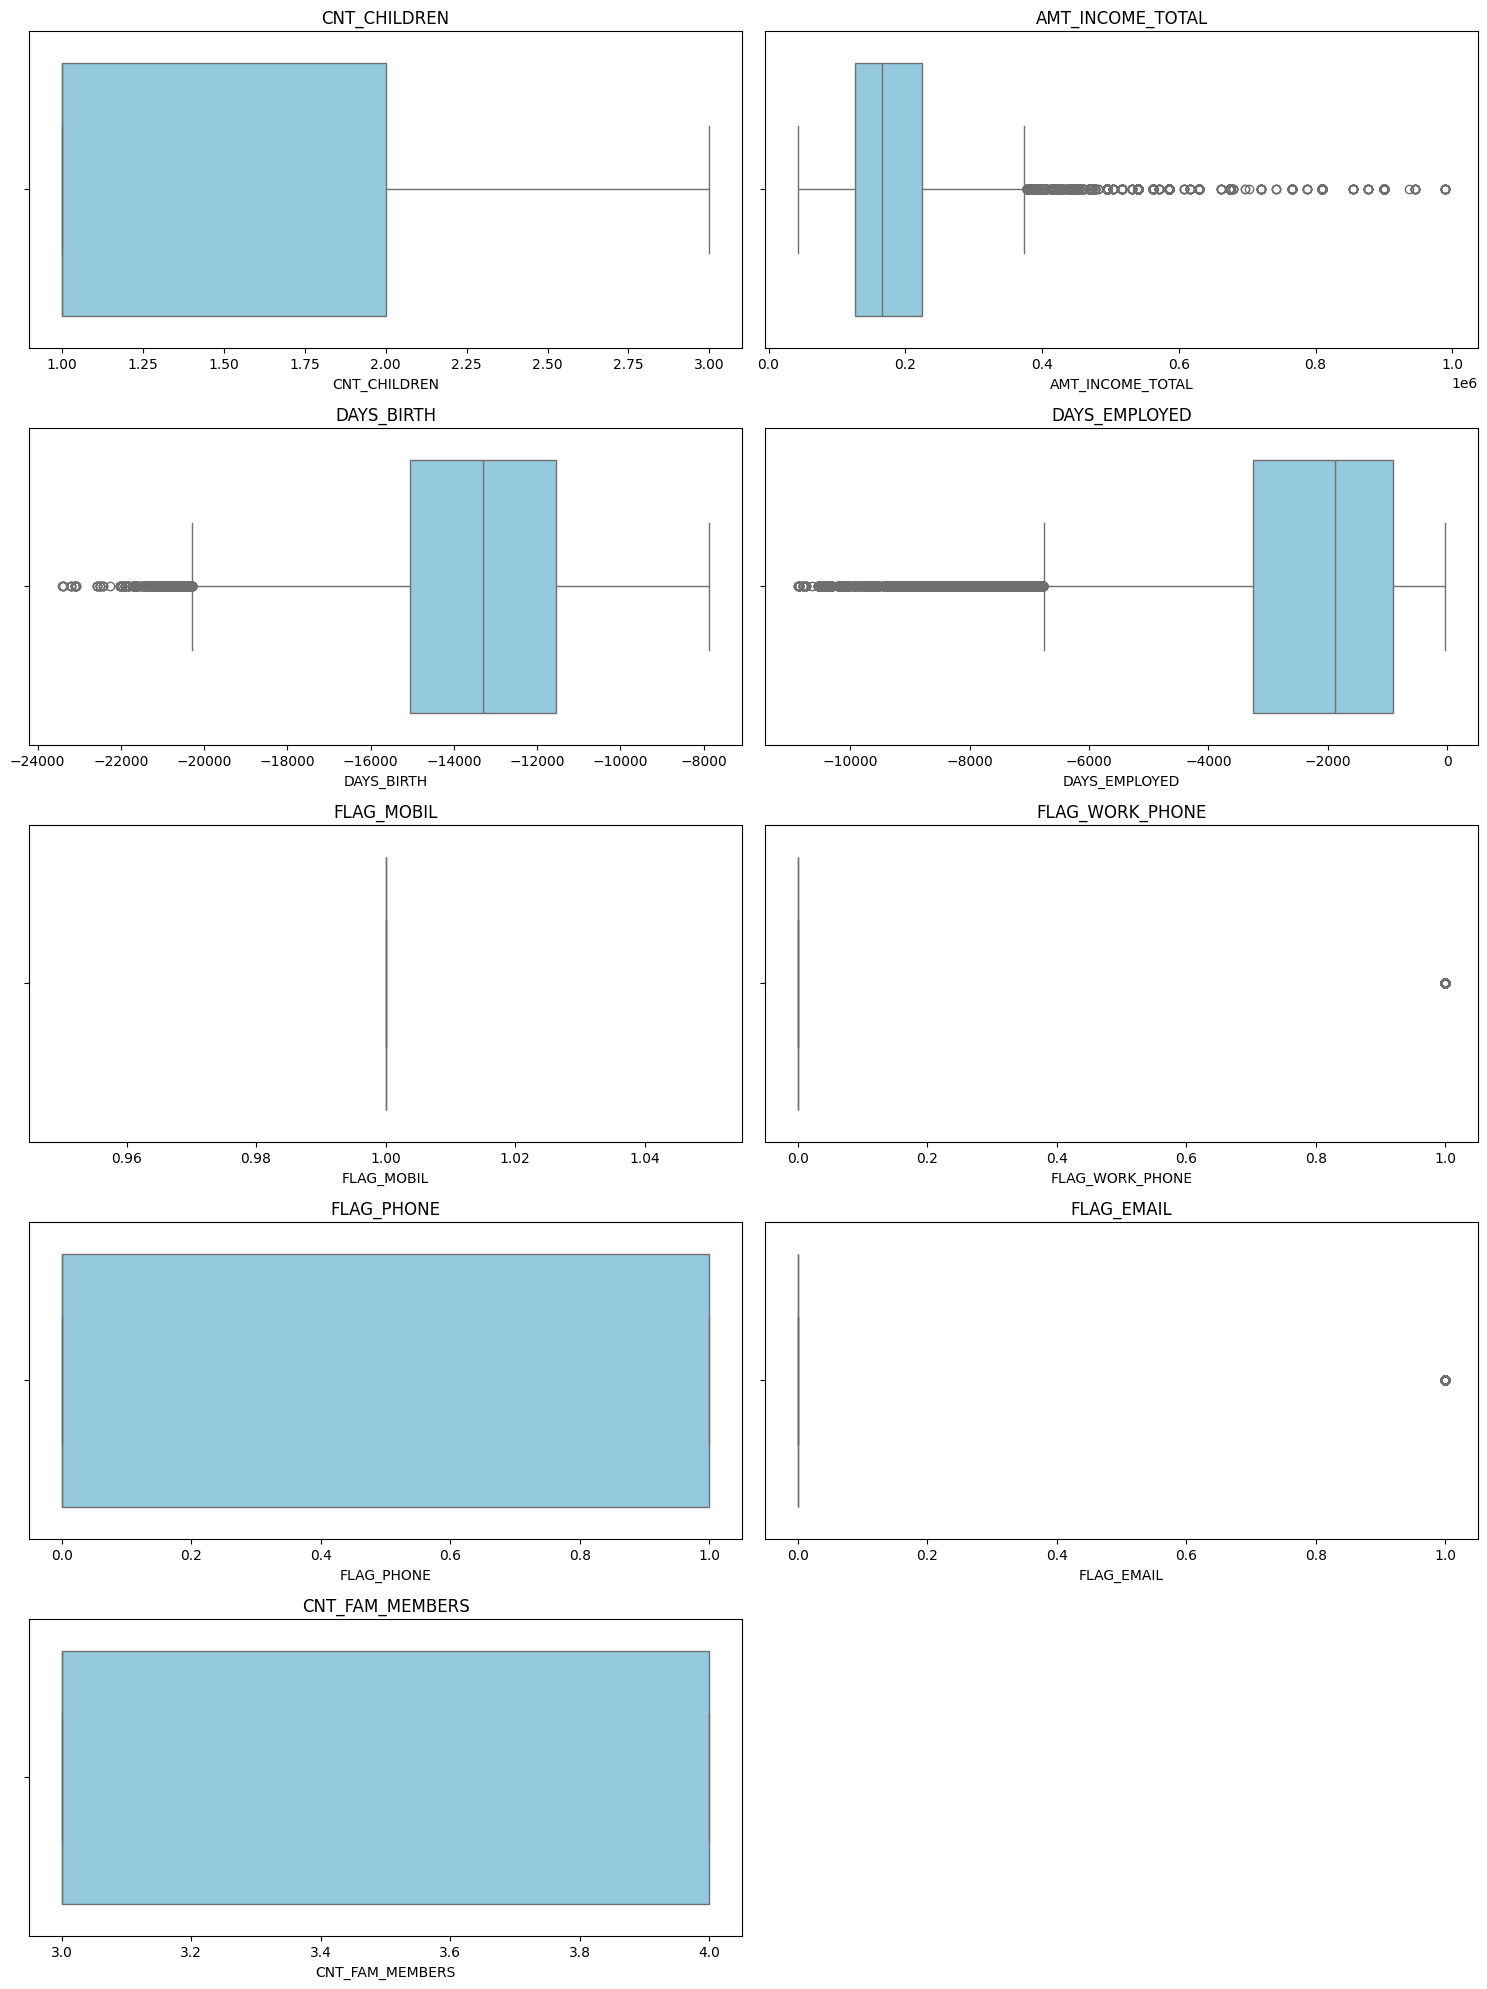

In [ ]:
n_cols = 2
n_rows = math.ceil(len(numerical_columns) / n_cols)

plt.figure(figsize=(15, n_rows * 4))

for i, col in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=application_data[col], color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()

По боксплотам заметно, что разброс значений уменьшился.

## Категориальные признаки

 Посмотрим на столбцы, которые имеют тип данных object.

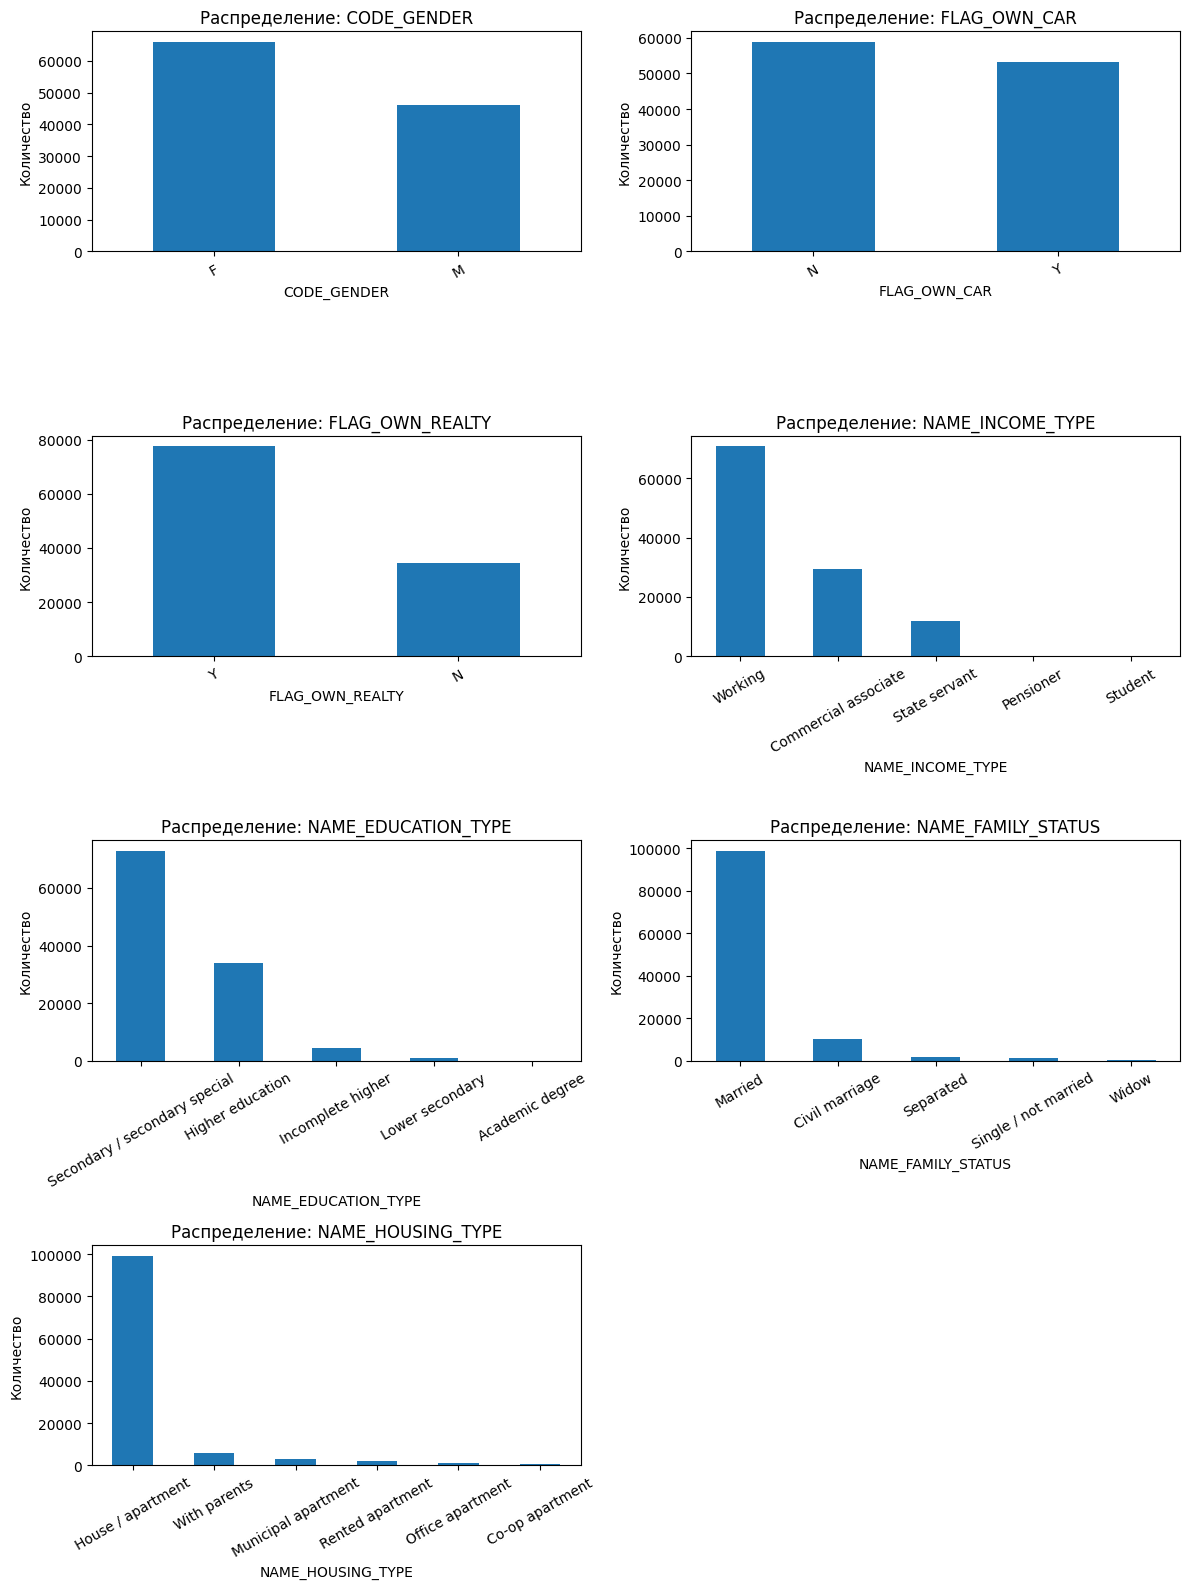

In [ ]:
object_cols = application_data.select_dtypes(include='object').columns

# Посмотрим на распределение значений в столбцах
n = len(object_cols)
ncols = 2
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4 * nrows))
axes = axes.flatten()

for i, col in enumerate(object_cols):
    application_data[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Распределение: {col}')
    axes[i].set_ylabel('Количество')
    axes[i].tick_params(axis='x', rotation=30)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Классифицируем различные типы значений категориальных признаков как 0, 1, 2...

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in application_data:
    if application_data[x].dtypes=='object':
        application_data[x] = le.fit_transform(application_data[x])

In [ ]:
application_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
29,5008838,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0
30,5008839,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0
31,5008840,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0
32,5008841,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0
33,5008842,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0


## Целевая переменная

Посмотрим на распределение значений признака **STATUS** во втором датасете:

In [ ]:
credit_data['STATUS'].value_counts()

,count
STATUS,
C,442031
0,383120
X,209230
1,11090
5,1693
2,868
3,320
4,223


Нам нужно ввести целевую переменную, чтобы классифицировать клиентов как "хороших" и "плохих". Будем считать, что клиенты, которые имеют просрочку платежа более месяца находятся в зоне риска.

In [ ]:
# Определяем клиентов с просрочками STATUS от 2 до 5 месяцев
credit_data["risk_flag"] = credit_data["STATUS"].astype(str).isin(["2", "3", "4", "5"]).astype(int)

# Группируем по ID, если есть просрочка → 1, иначе → 0
risk_per_client = credit_data.groupby("ID")["risk_flag"].max().reset_index()

# Объединяем с application_data
application_data = application_data.merge(risk_per_client, on="ID", how="inner")

application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9291 entries, 0 to 9290
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9291 non-null   int64  
 1   CODE_GENDER          9291 non-null   int64  
 2   FLAG_OWN_CAR         9291 non-null   int64  
 3   FLAG_OWN_REALTY      9291 non-null   int64  
 4   CNT_CHILDREN         9291 non-null   int64  
 5   AMT_INCOME_TOTAL     9291 non-null   float64
 6   NAME_INCOME_TYPE     9291 non-null   int64  
 7   NAME_EDUCATION_TYPE  9291 non-null   int64  
 8   NAME_FAMILY_STATUS   9291 non-null   int64  
 9   NAME_HOUSING_TYPE    9291 non-null   int64  
 10  DAYS_BIRTH           9291 non-null   int64  
 11  DAYS_EMPLOYED        9291 non-null   int64  
 12  FLAG_MOBIL           9291 non-null   int64  
 13  FLAG_WORK_PHONE      9291 non-null   int64  
 14  FLAG_PHONE           9291 non-null   int64  
 15  FLAG_EMAIL           9291 non-null   i

Таргетом будет признак **risk_flag**, посмотрим на распределение значений:

In [ ]:
application_data['risk_flag'].value_counts()

,count
risk_flag,
0,9144
1,147


Видим, что нужно будет решить проблему несбалансированности данных.

# Борьба с дисбалансом данных

Сперва выдели таргет в отдельную переменную:

In [ ]:
X = application_data.iloc[:,1:-1]
y = application_data.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

Отмасштабируем данные для корректного обучения:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_scaled = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(mms.transform(X_test), columns=X_test.columns)

Решаем проблему дисбаланса классов через оверсэмплинг:

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_train_scaled, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)

Посмотрим как изменился баланс классов до и после применения SMOTE:

In [ ]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_balanced))

Counter({0: 7318, 1: 114})
Counter({1: 7318, 0: 7318})


In [ ]:
print(Counter(y_test))
print(Counter(y_test_balanced))

Counter({0: 1826, 1: 33})
Counter({0: 1826, 1: 1826})


# Модель

Сейчас рассмотрим разные модели и сравним метрики.

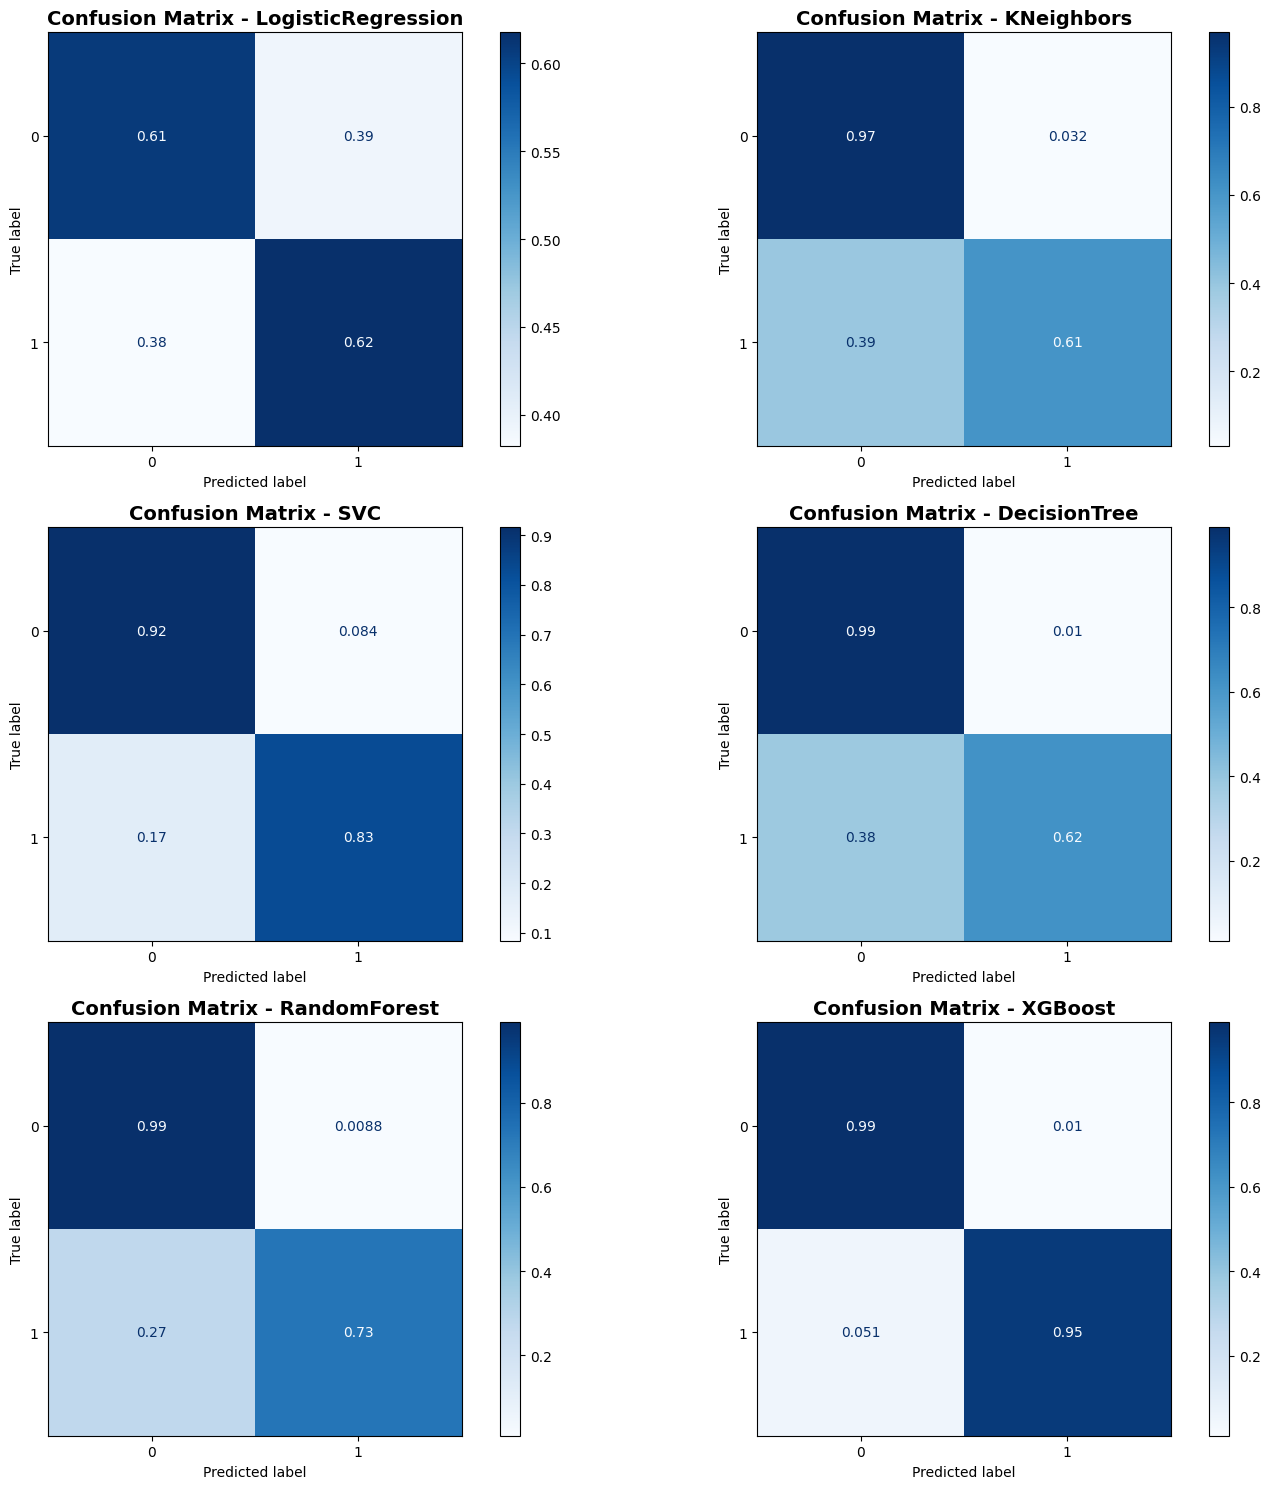

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

models = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
    "XGBoost" : XGBClassifier()
}

# Создаем subplots
n_models = len(models)
n_cols = 2  # Количество столбцов
n_rows = (n_models + 1) // n_cols  # Вычисляем количество строк

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Преобразуем в одномерный массив для удобства

train_scores = []
test_scores = []

# Обучаем модели и строим confusion matrix
for i, (name, model) in enumerate(models.items()):
    # Обучение модели
    model.fit(X_balanced, y_balanced)
    train_score = classifier.score(X_balanced, y_balanced)
    train_scores.append(train_score)
    test_score = classifier.score(X_test_balanced, y_test_balanced)
    test_scores.append(train_score)
    y_pred = model.predict(X_test_balanced)

    # Создание confusion matrix
    cm = confusion_matrix(y_test_balanced, y_pred, normalize='true')

    # Отображение confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Confusion Matrix - {name}', fontsize=14, fontweight='bold')
    axes[i].grid(False)

# Скрываем лишние subplots, если их количество не кратно n_cols
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(X_balanced, y_balanced)
    train_score = classifier.score(X_balanced, y_balanced)
    train_scores.append(train_score)
    test_score = classifier.score(X_test_balanced, y_test_balanced)
    test_scores.append(test_score)

print(train_scores)
print(test_scores)

[0.5994120060166827, 0.9759332695200328, 0.9350471762614522, 0.9941884315602352, 0.9941884315602352, 0.9932996034459183]
[0.6551064991807756, 0.8126706717640634, 0.8659202621518296, 0.8402512288367012, 0.8847624249044238, 0.9601310759148006]


Получили, что модель XGBoost выдала лучший результат на train и test сетах.

Будем использовать XGBoost для предсказания значений.

In [ ]:
xgb = XGBClassifier()
model = xgb.fit(X_balanced, y_balanced)
prediction = xgb.predict(X_test_balanced)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced, prediction))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1831
           1       0.99      0.93      0.96      1831

    accuracy                           0.96      3662
   macro avg       0.96      0.96      0.96      3662
weighted avg       0.96      0.96      0.96      3662

